In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
features = data.iloc[:,[2,3]].values
label = data.iloc[:,4].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=158)

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
#Evaluation
# 1. Test for generalization

print("Testing Score is {} and Training Score is {} ".format(model.score(X_test,y_test) , model.score(X_train,y_train)))

Testing Score is 0.8875 and Training Score is 0.834375 


In [10]:
# 2. Use Viz to check whether to accept or reject the model


In [11]:
#ROC Curve

model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [12]:
model.predict_proba(X_test)

array([[0.52936179, 0.47063821],
       [0.73047504, 0.26952496],
       [0.99294756, 0.00705244],
       [0.01820961, 0.98179039],
       [0.98308981, 0.01691019],
       [0.70932913, 0.29067087],
       [0.40586153, 0.59413847],
       [0.61896909, 0.38103091],
       [0.42952317, 0.57047683],
       [0.86988784, 0.13011216],
       [0.97703232, 0.02296768],
       [0.98930623, 0.01069377],
       [0.97755709, 0.02244291],
       [0.95783254, 0.04216746],
       [0.19585242, 0.80414758],
       [0.90769454, 0.09230546],
       [0.99864279, 0.00135721],
       [0.59328594, 0.40671406],
       [0.85688509, 0.14311491],
       [0.99581619, 0.00418381],
       [0.72683446, 0.27316554],
       [0.97801209, 0.02198791],
       [0.96589618, 0.03410382],
       [0.74269916, 0.25730084],
       [0.08985925, 0.91014075],
       [0.52611983, 0.47388017],
       [0.99036258, 0.00963742],
       [0.59454897, 0.40545103],
       [0.98785702, 0.01214298],
       [0.99684562, 0.00315438],
       [0.

## **ROC is only applicable for Balanced Dataset. This code is just a demo explaining how to plot ROC curve**

In [13]:
#Plot ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#Step1:  Extract the prob value of 1
probabilityValues = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)
y_pred
probabilityValues

array([0.47063821, 0.26952496, 0.00705244, 0.98179039, 0.01691019,
       0.29067087, 0.59413847, 0.38103091, 0.57047683, 0.13011216,
       0.02296768, 0.01069377, 0.02244291, 0.04216746, 0.80414758,
       0.09230546, 0.00135721, 0.40671406, 0.14311491, 0.00418381,
       0.27316554, 0.02198791, 0.03410382, 0.25730084, 0.91014075,
       0.47388017, 0.00963742, 0.40545103, 0.01214298, 0.00315438,
       0.71324656, 0.22376806, 0.2483661 , 0.92907956, 0.10813368,
       0.92680935, 0.21216562, 0.78887502, 0.69962036, 0.08779373,
       0.05889431, 0.97176578, 0.99226092, 0.00824507, 0.58969073,
       0.38166854, 0.40610271, 0.5125389 , 0.03822113, 0.04019347,
       0.26233631, 0.00768597, 0.91393488, 0.98160219, 0.03333872,
       0.0750562 , 0.07433231, 0.44064713, 0.18742495, 0.97289726,
       0.03057582, 0.24985122, 0.30440378, 0.0041404 , 0.06514949,
       0.50536168, 0.45753052, 0.84638554, 0.33521721, 0.92733475,
       0.96575077, 0.01129237, 0.82054292, 0.92241844, 0.46538

In [24]:
#Step2: Calc AUC
auc = roc_auc_score(y_test,y_pred)
auc

0.8636363636363636

0.8636363636363636


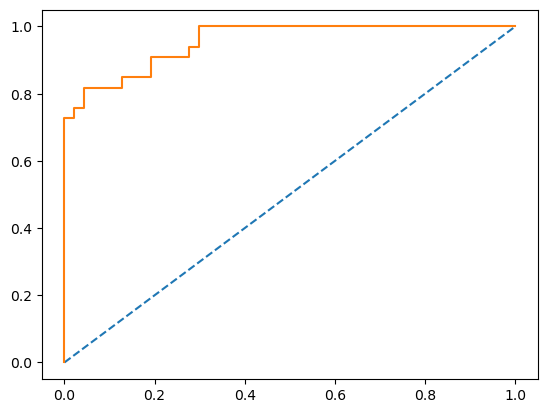

In [25]:
#Step3: Plot Skill Line (0,0)(1,1)
plt.plot([0,1],[0,1],linestyle="--")

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test,probabilityValues)
plt.plot(fpr,tpr)
print(auc)

PR Curve

0.8522560178749757


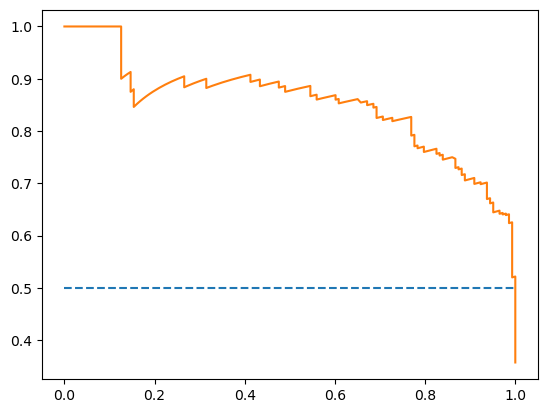

In [17]:
#Plot PR
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1:  Extract the prob value of 1
probabilityValues = model.predict_proba(features)[:,1]

#Step2: Calc AUC & PR values
precision,recall,_ = precision_recall_curve(label,probabilityValues)
aucPR = auc(recall,precision)

#Step3: Plot Skill Line (0,0.5)(1,0.5)
plt.plot([0,1],[0.5,0.5],linestyle="--")

#Step4: Plot PR
plt.plot(recall,precision)
print(aucPR)